### Imports

In [125]:
from sklearn import preprocessing

from dataset import *
from base_model import *
from neural_net import *
from sampled_net import *
from visualisator import *
from logic import *
import dataset
import base_model
import neural_net
import sampled_net
import visualisator
import logic

import importlib

importlib.reload(dataset)
importlib.reload(base_model)
importlib.reload(neural_net)
importlib.reload(sampled_net)
importlib.reload(visualisator)
importlib.reload(logic)

<module 'logic' from 'c:\\Users\\daydo\\OneDrive\\Dokumente\\sampled-networks\\logic.py'>

### Dataset creation

In [127]:
xd = 4  # Input space dimensions
yd = 4  # Output dimension
num_samples = 1000  # Number of data points
epochs = 100  # Number of training epochs
l = [200]  # Number of neurons in each layer


dataset = Dataset()
dataset.create_dataset_Barron(xd, num_samples)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

### Neural Network training with Adam

In [128]:
model_nn = NeuralNet()
model_nn.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=epochs)

### Sampled Netwrok training with ridge, and losses comparaison

In [114]:
model_sampled = SampledNet()
alpha, radius = model_sampled.fit(
    dataset.X_train, dataset.y_train, model_nn, layer2="ridge", radius=-1, alpha=-1
)

y_nn = model_nn.predict(dataset.X_test)
y_sampled = model_sampled.predict(dataset.X_test)

print(
    f"loss y_nn and y_test      \t{sklearn.metrics.mean_squared_error(y_nn, dataset.y_test)}"
)
print(
    f"loss y_sampled and y_test \t{sklearn.metrics.mean_squared_error(y_sampled, dataset.y_test)}"
)


radius: 0.000


100%|██████████| 200/200 [00:00<00:00, 4081.85it/s]


alpha 	loss
0.0001 	1.553e-02
0.001 	1.402e-02
0.01 	1.407e-02
0.1 	1.409e-02
1 	1.408e-02
10 	1.395e-02
100 	1.327e-02

radius: 0.204


100%|██████████| 200/200 [00:00<00:00, 2579.44it/s]

alpha 	loss
0.0001 	1.517e-02
0.001 	8.737e-03
0.01 	8.535e-03
0.1 	9.798e-03


1 	1.259e-02
10 	1.335e-02
100 	1.284e-02

radius: 0.409


100%|██████████| 200/200 [00:00<00:00, 541.77it/s]


alpha 	loss
0.0001 	4.089e-03
0.001 	3.979e-03
0.01 	3.666e-03
0.1 	3.653e-03
1 	6.135e-03
10 	9.379e-03
100 	9.999e-03

radius: 0.613


100%|██████████| 200/200 [00:01<00:00, 161.45it/s]


alpha 	loss
0.0001 	1.798e-03
0.001 	1.539e-03
0.01 	1.402e-03
0.1 	1.555e-03
1 	2.644e-03
10 	6.091e-03
100 	7.777e-03

radius: 0.818


100%|██████████| 200/200 [00:03<00:00, 58.88it/s]


alpha 	loss
0.0001 	1.096e-03
0.001 	1.041e-03
0.01 	9.048e-04
0.1 	8.812e-04
1 	1.519e-03
10 	4.019e-03
100 	5.923e-03

radius: 1.022


100%|██████████| 200/200 [00:07<00:00, 28.21it/s]


alpha 	loss
0.0001 	8.914e-04
0.001 	6.544e-04
0.01 	6.111e-04
0.1 	6.208e-04
1 	1.138e-03
10 	3.507e-03
100 	5.290e-03

radius: 1.227


100%|██████████| 200/200 [00:10<00:00, 19.34it/s]


alpha 	loss
0.0001 	7.772e-04
0.001 	6.372e-04
0.01 	6.104e-04
0.1 	6.112e-04
1 	1.001e-03
10 	3.275e-03
100 	5.149e-03

radius: 1.431


100%|██████████| 200/200 [00:12<00:00, 16.23it/s]


alpha 	loss
0.0001 	7.811e-04
0.001 	6.650e-04
0.01 	5.821e-04
0.1 	5.808e-04
1 	9.573e-04
10 	3.166e-03
100 	5.156e-03

radius: 1.636


100%|██████████| 200/200 [00:12<00:00, 16.11it/s]


alpha 	loss
0.0001 	7.811e-04
0.001 	6.650e-04
0.01 	5.821e-04
0.1 	5.808e-04
1 	9.573e-04
10 	3.166e-03
100 	5.156e-03

radius: 1.840


100%|██████████| 200/200 [00:12<00:00, 15.81it/s]

alpha 	loss
0.0001 	7.811e-04
0.001 	6.650e-04
0.01 	5.821e-04
0.1 	5.808e-04
1 	9.573e-04
10 	3.166e-03
100 	5.156e-03
loss y_nn and y_test      	0.005011043333793569
loss y_sampled and y_test 	0.0009925300267957869


### Plot the weights' angles differences, and prediction vs actual visualization

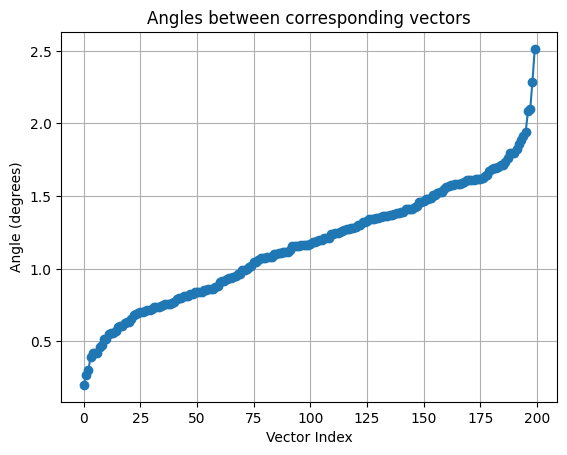

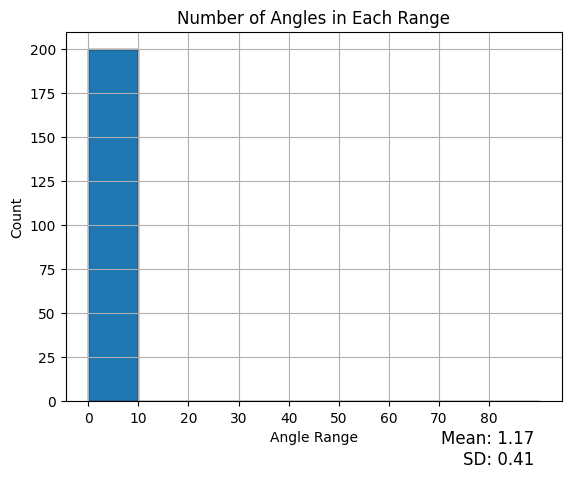

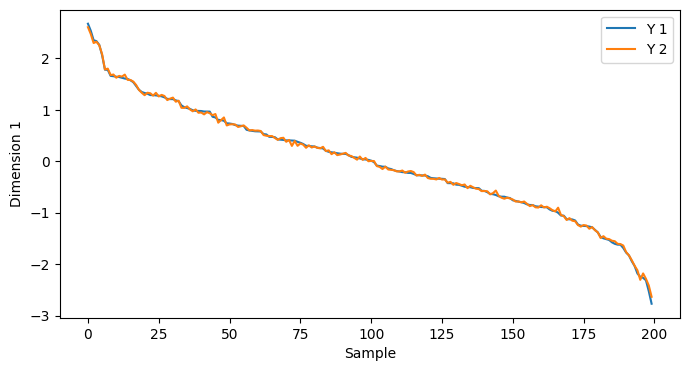

In [115]:
plot_vector_differences(
    np.transpose(model_nn.weights[0]), np.transpose(model_sampled.weights[0])
)
visualize_data(dataset.y_test, y_sampled)

### Calculate loss vs alpha, radius.

In [129]:
dict_loss_vs_alpha_radius = loss_vs_aslpha_radius(dataset, model_nn)
write_to_file("results\loss_vs_alpha_radius.json", dict_loss_vs_alpha_radius)

radius: 0.000


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:00<00:00, 3048.12it/s]


radius: 0.188


100%|██████████| 200/200 [00:00<00:00, 2196.57it/s]


radius: 0.376


100%|██████████| 200/200 [00:00<00:00, 415.43it/s]


radius: 0.564


100%|██████████| 200/200 [00:01<00:00, 128.16it/s]


radius: 0.752


100%|██████████| 200/200 [00:04<00:00, 47.51it/s]


radius: 0.940


100%|██████████| 200/200 [00:07<00:00, 25.32it/s]


radius: 1.129


100%|██████████| 200/200 [00:13<00:00, 15.09it/s]


radius: 1.317


100%|██████████| 200/200 [00:15<00:00, 12.85it/s]


radius: 1.505


100%|██████████| 200/200 [00:16<00:00, 12.01it/s]


radius: 1.693


100%|██████████| 200/200 [00:15<00:00, 12.59it/s]


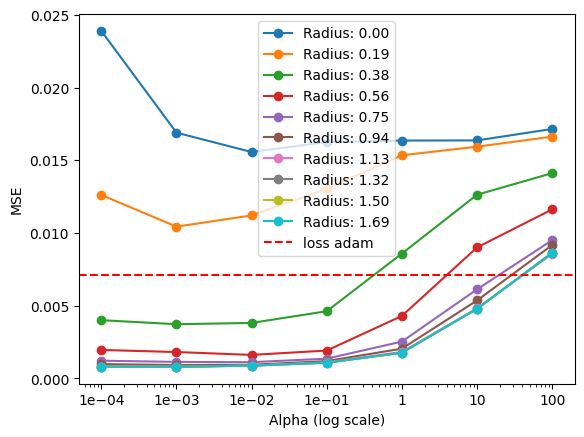

In [131]:
dict_loss_vs_alpha_radius = read_from_file("results\loss_vs_alpha_radius.json")
plot_loss_vs_alpha_radius(dict_loss_vs_alpha_radius)

### dataset creation and neural networks training with different numbre of samples

In [46]:
nums_samples = [100, 200, 400, 800, 1600, 3200, 6400]
xd = 4
layers = [200]
datasets = []
models_nn = []
for num_samples in nums_samples:
    model_nn = NeuralNet()
    dataset = Dataset().create_dataset_Barron(xd, num_samples)
    dataset.scale(preprocessing.MinMaxScaler())
    dataset.split_train_test(0.2)
    model_nn.fit(dataset.X_train, dataset.y_train, layers)
    datasets.append(dataset)
    models_nn.append(model_nn)

### loss vs number of samples

In [ ]:
# Attention, takes 30+ minutes
dict_losses_vs_num_samples = loss_vs_num_samples(datasets, models_nn)
write_to_file("results\loss_vs_num_samples.json", dict_losses_vs_num_samples)

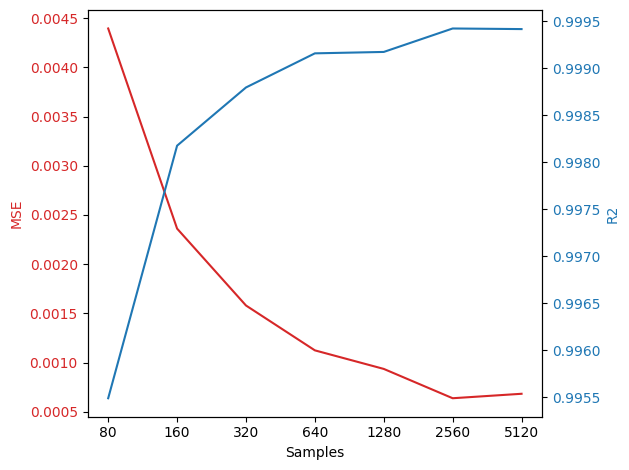

In [132]:
dict_losses_vs_num_samples = read_from_file("results\loss_vs_num_samples.json")
plot_loss_f_num_samples(dict_losses_vs_num_samples)